In [0]:
# Importing the library 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

import pandas as pd

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


In [0]:
##Reading the dataset
X, y = load_boston(return_X_y=True)

In [214]:
###Looking at shape 
X.shape

(506, 13)

In [215]:
y.shape

(506,)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

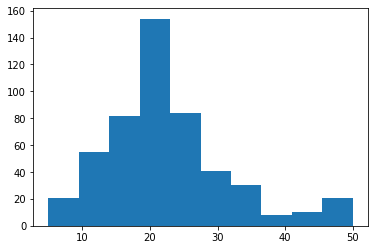

In [216]:
##Looking at y distribution
plt.hist(target)

In [0]:
X=torch.from_numpy(X)
y=torch.from_numpy(y)
X=X.float()
y=y.float()


In [0]:
#TensorDataset allows to get rows from X and Y as tuples.
#DataLoader split the data into batches while training

In [219]:

df = TensorDataset(X, y)
df[0:3]

(tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
          6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
          4.9800e+00],
         [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
          7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
          9.1400e+00],
         [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 7.1850e+00,
          6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9283e+02,
          4.0300e+00]]), tensor([24.0000, 21.6000, 34.7000]))

In [220]:
batchsize = 5
df = DataLoader(df, batchsize, shuffle=True)
next(iter(df))

[tensor([[6.2110e-02, 4.0000e+01, 1.2500e+00, 0.0000e+00, 4.2900e-01, 6.4900e+00,
          4.4400e+01, 8.7921e+00, 1.0000e+00, 3.3500e+02, 1.9700e+01, 3.9690e+02,
          5.9800e+00],
         [1.4438e+01, 0.0000e+00, 1.8100e+01, 0.0000e+00, 5.9700e-01, 6.8520e+00,
          1.0000e+02, 1.4655e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 1.7936e+02,
          1.9780e+01],
         [3.8497e+00, 0.0000e+00, 1.8100e+01, 1.0000e+00, 7.7000e-01, 6.3950e+00,
          9.1000e+01, 2.5052e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.9134e+02,
          1.3270e+01],
         [2.1492e+00, 0.0000e+00, 1.9580e+01, 0.0000e+00, 8.7100e-01, 5.7090e+00,
          9.8500e+01, 1.6232e+00, 5.0000e+00, 4.0300e+02, 1.4700e+01, 2.6195e+02,
          1.5790e+01],
         [1.3880e+00, 0.0000e+00, 8.1400e+00, 0.0000e+00, 5.3800e-01, 5.9500e+00,
          8.2000e+01, 3.9900e+00, 4.0000e+00, 3.0700e+02, 2.1000e+01, 2.3260e+02,
          2.7710e+01]]), tensor([22.9000, 27.5000, 21.7000, 19.4000, 13.2000])]

In [221]:
# Defining the regression model
model = nn.Linear(13,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0431, -0.0619, -0.0038,  0.2055, -0.1150, -0.1098,  0.0169,  0.0512,
          0.2727,  0.0249, -0.2294, -0.1087, -0.0365]], requires_grad=True)
Parameter containing:
tensor([-0.1727], requires_grad=True)


In [0]:
# Defining the SGD optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-7)

In [0]:
# Define loss function
loss_fn = F.mse_loss

In [224]:
loss = loss_fn(model(X), y)
print(loss)

tensor(3165.7556, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


In [0]:
#Defining  utility function for  model training
def model_fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for x_var,y_var in df:
            # Generating the  predictions from the model
            predictions = model(x_var)
            loss = loss_fn(predictions, y_var)
            # Performing  SGD
            loss.backward()
            opt.step()
            opt.zero_grad()
        print('Training loss: ', loss_fn(model(X), y))

In [226]:
# Training  the model for 50 epochs
model_fit(100, model, loss_fn, opt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()


Training loss:  tensor(263.6963, grad_fn=<MseLossBackward>)
Training loss:  tensor(162.9927, grad_fn=<MseLossBackward>)
Training loss:  tensor(128.9978, grad_fn=<MseLossBackward>)
Training loss:  tensor(114.4925, grad_fn=<MseLossBackward>)
Training loss:  tensor(113.7887, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.2338, grad_fn=<MseLossBackward>)
Training loss:  tensor(110.6692, grad_fn=<MseLossBackward>)
Training loss:  tensor(113.4122, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.5962, grad_fn=<MseLossBackward>)
Training loss:  tensor(112.8768, grad_fn=<MseLossBackward>)
Training loss:  tensor(111.1895, grad_fn=<MseLossBackward>)
Training loss:  tensor(110.6148, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.4210, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.7613, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.6420, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.5554, grad_fn=<MseLossBackward>)
Training loss:  tensor(109.5121, grad_fn

In [227]:
# Generate predictions
predictions = model(X)
predictions[0:3]

tensor([[21.7955],
        [21.3012],
        [20.4461]], grad_fn=<SliceBackward>)

In [228]:
y[0:3],predictions[0:3]

(tensor([24.0000, 21.6000, 34.7000]), tensor([[21.7955],
         [21.3012],
         [20.4461]], grad_fn=<SliceBackward>))

In [229]:
err=y-predictions
rmse=torch.sqrt(torch.sum(err**2)/err.numel())
rmse

tensor(10.2552, grad_fn=<SqrtBackward>)